In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

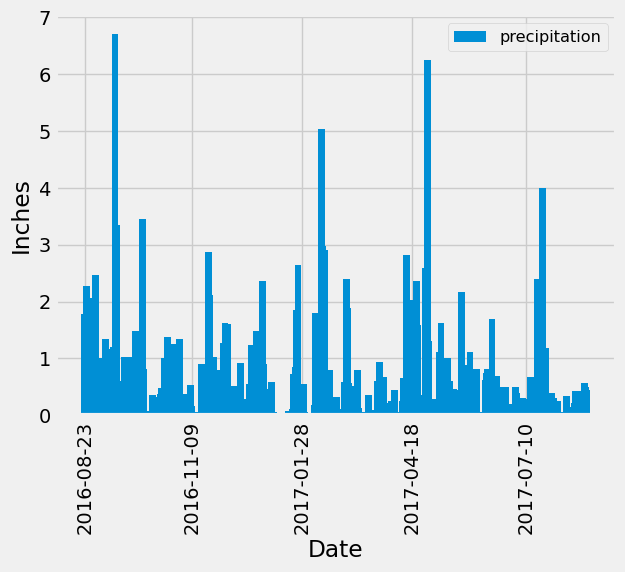

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query1 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= "2016-08-23").\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_query = pd.DataFrame(query1, columns = ["date", "precipitation"])

# Sort the dataframe by date
precipitation_query = precipitation_query.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
fig = plt.figure(figsize=(7,5))
ax= fig.add_axes([0.1, 0.1, 0.8, 0.8])
precipplot = plt.bar(precipitation_query.date, precipitation_query.precipitation, width=5)
plt.xlabel("Date")
plt.ylabel("Inches")
ax.set_xticks(["2016-08-23", "2016-11-09", "2017-01-28", "2017-04-18", "2017-07-10"])
plt.xticks(rotation = 90)
plt.legend(["precipitation"], loc="best", fontsize="small")
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
pd.DataFrame(precipitation_query.precipitation.describe())

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).\
    distinct().count()

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station).label("Count")).\
    group_by(Measurement.station).order_by(desc("Count")).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281")

for temp in temperatures:
    print(temp)

(54.0, 85.0, 71.66378066378067)


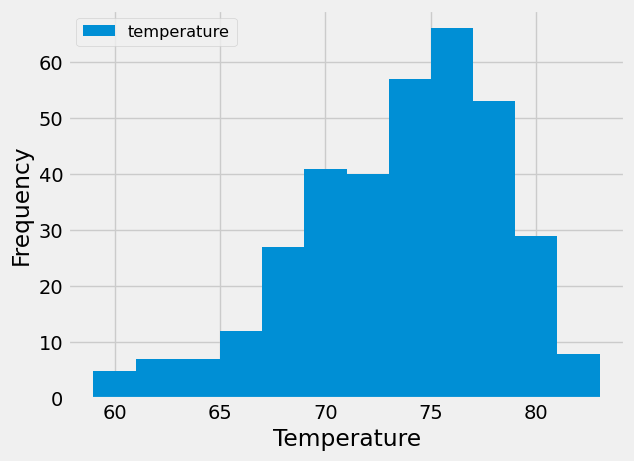

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temps = session.query(Measurement.tobs).\
    filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.station == "USC00519281")

temps_query = pd.DataFrame(station_temps, columns = ["temperature"])

plt.hist(temps_query, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["temperature"], loc="best", fontsize="small")
plt.show()

# Close Session

In [17]:
# Close Session
session.close()